In [136]:
#다항회귀는 데이터가 선형(직선)이 아닌 곡선으로 나타나는 경우 사용하는 회귀


In [137]:
# 다항에서의 항은 차수(degree)이며 x³-2x-4=0 과 같이 차수가 많다는 의미
# 차수가 많을수록 기존의 모델보다 오차를 더 줄일 수 있다.

#데이터 불러오기
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

#농어의 길이 높이 너비 (train훈련용 데이터임)
print('길이\t높이\t너비')
print(perch_full)

길이	높이	너비
[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40

In [138]:
import numpy as np

#농어의 무게(target데이터용)
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

In [139]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누기 (80:20비율로)
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, test_size=0.2, random_state=42)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

((44, 3), (12, 3), (44,), (12,))

In [140]:

#해당 데이터를 다항으로 나타내기위해 클래스 임포트

from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures 클래스의 이해를 위한 예시
poly = PolynomialFeatures()
poly.fit([[2, 3]])

print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [141]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit([[2, 3]])

print(poly.transform([[2, 3]]))

[[ 2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [142]:
#PolynomailFeatures() 를 적용하기 전의 데이터 형태
print("Not poly train data : {} / Not poly test data : {}".format(train_input.shape, test_input.shape))

poly = PolynomialFeatures(include_bias=False)

train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

#PolynomialFeatures() 를 적용한 후의 데이터 형태
print("Poly train data : {} / Poly test data : {}\n".format(train_poly.shape, test_poly.shape))

Not poly train data : (44, 3) / Not poly test data : (12, 3)
Poly train data : (44, 9) / Poly test data : (12, 9)



In [143]:
#Polynomial data shape
poly.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [144]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

#훈련 데이터의 정확도
print(lr.score(train_poly, train_target))
#테스트 데이터의 정확도
print(lr.score(test_poly, test_target))

# 두 데이터 모두 정확도가 상승하였고 
#과대적합도 해결되었음

0.9900974417605038
0.9766805886149335


여기서 degree(차수)를 5로 변경하면?

In [145]:
poly = PolynomialFeatures(degree=5, include_bias=False)
train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

lr.fit(train_poly, train_target)

#훈련 데이터의 정확도
print(lr.score(train_poly, train_target))
#테스트 데이터의 정확도
print(lr.score(test_poly, test_target))

#보다시피 특성의 개수가 과도하게 많아졌기때문에 
#테스트데이터가 비정상으로 나왔음

0.9999999999218725
-167.27001654442154


In [146]:
#이러한 문제는 규제(Regulation)을 통해서 해결해야 한다.
#사이킷런(sklearn)은 선형회귀에서 이런 상황을 해결 할 수 있는 
#규제 클래스인 Ridge와 Lasso를 제공한다.
from sklearn.preprocessing import StandardScaler

#데이터 전처리-표준화
#서로 다른 단위를 표준화시켜줌으로써 정확도를 더 높일 수 있다.
#기본 스케일러, 평균과 표준편차를 사용
ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [147]:
#릿지
from sklearn.linear_model import Ridge

#릿지
ridge = Ridge()
ridge.fit(train_scaled, train_target)

#훈련 데이터의 정확도
print(ridge.score(train_scaled, train_target))
#테스트 데이터의 정확도
print(ridge.score(test_scaled, test_target))

#마이너스던 테스트셋 정확도가 개선되었다.

0.9896004835191297
0.978920058325178


In [148]:
#릿지에서는 하이퍼파라미터를 통해 alpha라는 매개변수 값을 조절 가능하다.
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
 

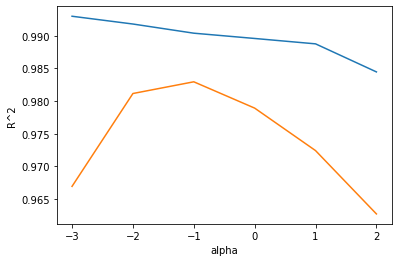

In [153]:

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

#알파값이 -1에 가까울때 정확도가 높다는 뜻
# 즉 10^-1은 0.1

In [154]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9904101980758973
0.9829550564532439


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.347e+04, tolerance: 5.214e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.032e+04, tolerance: 5.214e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

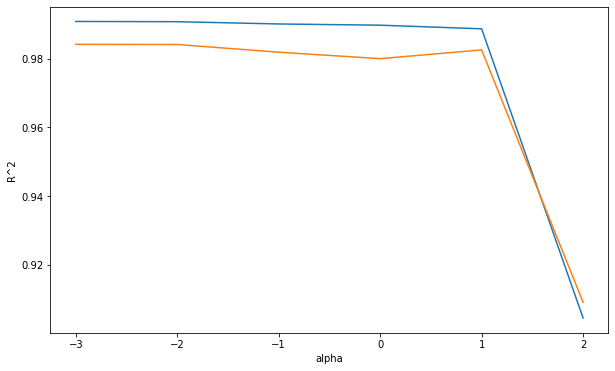

In [155]:
from sklearn.linear_model import Lasso 

train_score = []
test_score = []

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_values:

    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha)

    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)

    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.log10(alpha_values), train_score)
ax.plot(np.log10(alpha_values), test_score)
ax.set_xlabel('alpha') # 라쏘회귀 규제의 강도
ax.set_ylabel('R^2') # 결정계수
plt.show()

In [157]:
#10^1은 10이므로 알파값에 10을 넣어주면 가장 최적의 결과가 나옴
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))
#보다시피 훈련셋이랑 테스트셋의 차이가 거의 없다

0.9887275726909217
0.9825903205582611
